## Exercise 2

For this exercise , you will be working with the [Titanic Data Set from Kaggle](https://www.kaggle.com/c/titanic). This is a very famous data set and very often is a student's first step in Data Analytics! 

The Dataset has been given to you on D2L. You need to download the .csv file from your assignment folder. The above link is just for a reference story about the data. 


1- For this assignment, you need to perform explorotary data analysis and answer at least three hypotheses based on the dataset. You may need to use your knowledge of statiscts to analyze this data.

Here are three possible hypotheses that you can define for this dataset (you can define your own hypotheses as well):

- Determine if the survival rate is associated to the class of passenger
- Determine if the survival rate is associated to the gender
- Determine the survival rate is associated to the age



2- For each hypothesis, you need to make at least one plot. 

3- Write a summary of your findings in one page (e.g., summary statistics, plots) and submit the pdf file. Therefore, for part 2 of your assignment, you need to submit one jupyter notebook file and one pdf file.

This will be your first end to end data analysis project. For this assignment, you will be graded on you overall analysis, and your final report.

4- Push your code and project to github and provide the link to your code here.



Ensure that your github project is organized to at least couple of main folders, ensure that you have the README file as well:

- Src
- Data
- Docs
- Results

Read this link for further info:  https://gist.github.com/ericmjl/27e50331f24db3e8f957d1fe7bbbe510

In [4]:
#Import data set

import pandas as pd

titanic = pd.read_csv("titanic.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [94]:
#Identify data set variables
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

``Hypothesis 1 - Determine if the survival rate is associated to the class of passenger``

In [14]:
#Identify how the Class was divided inside the ship

total_passengers = titanic.shape[0]

Class_1 = (titanic['Pclass'] == 1).sum()
Class_2 = (titanic['Pclass'] == 2).sum()
Class_3 = (titanic['Pclass'] == 3).sum()

first_class =  Class_1 / total_passengers * 100
sec_class = Class_2 / total_passengers * 100
third_class = Class_3 / total_passengers * 100

print('First class % = ', first_class, ', in total ', Class_1)
print('Second class % = ', sec_class, ', in total ', Class_2)
print('Third class % = ', third_class, ', in total ', Class_3)

First class % =  24.242424242424242 , in total  216
Second class % =  20.65095398428732 , in total  184
Third class % =  55.106621773288445 , in total  491


Here we can see that in the third class there was more than 50% of the ship passengers, first class having a 24.4% and second class having a 20.1%.

Now, we want to compare this percentages with the survivor rate. 

In [19]:
count_survivors = titanic['Survived'].sum()
by_class = titanic.groupby('Pclass')
count_class = by_class['Survived'].sum()
survival_perc = count_class / count_survivors * 100
survival_perc

Pclass
1    39.766082
2    25.438596
3    34.795322
Name: Survived, dtype: float64

Here we can see that, 

The first class represents the 24.24% of the passengers, but the 39.7% of the survivors
The second class represents the 20% of the passengers, but the 25.4% of the survivors
The third class representes ≈ 55% of the passengers, but the 34.8% of the survivors

This means that first class survivors could have had a priority over other classes during the last minutes of the ship. 

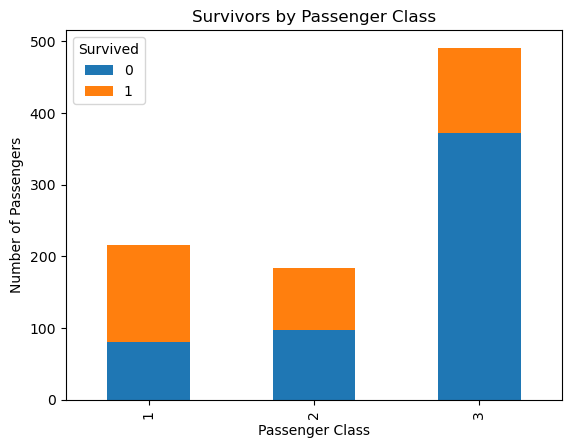

In [22]:
import matplotlib.pyplot as plt

# Calculate the number of survivors and non-survivors per passenger class
survivors_by_class = titanic.groupby(['Pclass', 'Survived']).size().unstack()

# Plot the data as a stacked bar chart
survivors_by_class.plot(kind='bar', stacked=True)

# Add labels and title to the chart
plt.title('Survivors by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Number of Passengers')

# Display the chart
plt.show()

In the chart above, we can confirm the association between between the class and survivors. The first bar represents first class, the orange part representing survivors, and if we compare it to the third class (third bar), is higher, even though the third class more of the 50% of the passengers. 

```Hypothesis 2 -Determine if the survival rate is associated to the gender```

In [36]:
# Count of passengers by gender
count_by_gender = titanic.groupby('Sex')['Survived'].count()

#Survival count by gender
survival_by_gender = titanic.groupby('Sex')['Survived'].sum()

#Casualties count by gender
death_by_gender = count_by_gender - survival_by_gender

#Calculate the survival percentage by gender
surv_perc_by_gender = survival_by_gender / count_by_gender * 100

# Calculate the casualties percentage by gender
death_perc_by_gender = death_by_gender / count_by_gender * 100

# Print the survival and casualties percentage by gender

print('Survival percentage by gender:')
print(surv_perc_by_gender)
print('\nCasualties percentage by gender:')
print(death_perc_by_gender)

Survival percentage by gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Casualties percentage by gender:
Sex
female    25.796178
male      81.109185
Name: Survived, dtype: float64


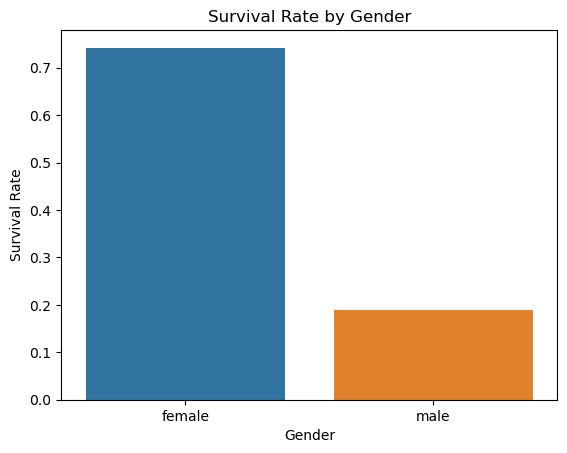

In [37]:
import seaborn as sns

survive_by_gender = titanic.groupby('Sex')['Survived'].mean().reset_index()

sns.barplot(x='Sex', y='Survived', data=survive_by_gender)

plt.title('Survival Rate by Gender')
plt.xlabel('Gender')
plt.ylabel('Survival Rate')

plt.show()

In the above data we can see the count numbers of survivors by gender. Female having 233 survivors, that being the 74.2% of the survivors and Male only having the 18.9%. The sum of survival percentages is less than 100. This is because there are missing values in the 'Survived' column for some passengers, which means they are excluded from the calculation. But this still reflects that women had more chance of surviving than men. 

```Hypothesis 3 - Determine the survival rate is associated to the age```

In [96]:
print('Yougest passenger: ' + str(titanic['Age'].min() * 12) + ' months old')
print('Oldest passenger: ' + str(titanic['Age'].max()) + ' years old')

Yougest passenger: 5.04 months old
Oldest passenger: 80.0 years old


We were able to identify that the youngest passenger was just 5 months old, and the oldest was 80 years old. Now we're going to try to identify which had more chances of surviving.

In [51]:
#Identify unique ages on data set
unique_age = data_age_mis_values['Age'].unique()
unique_age.sort()
unique_age

array([ 0.42,  0.67,  0.75,  0.83,  0.92,  1.  ,  2.  ,  3.  ,  4.  ,
        5.  ,  6.  ,  7.  ,  8.  ,  9.  , 10.  , 11.  , 12.  , 13.  ,
       14.  , 14.5 , 15.  , 16.  , 17.  , 18.  , 19.  , 20.  , 20.5 ,
       21.  , 22.  , 23.  , 23.5 , 24.  , 24.5 , 25.  , 26.  , 27.  ,
       28.  , 28.5 , 29.  , 30.  , 30.5 , 31.  , 32.  , 32.5 , 33.  ,
       34.  , 34.5 , 35.  , 36.  , 36.5 , 37.  , 38.  , 39.  , 40.  ,
       40.5 , 41.  , 42.  , 43.  , 44.  , 45.  , 45.5 , 46.  , 47.  ,
       48.  , 49.  , 50.  , 51.  , 52.  , 53.  , 54.  , 55.  , 55.5 ,
       56.  , 57.  , 58.  , 59.  , 60.  , 61.  , 62.  , 63.  , 64.  ,
       65.  , 66.  , 70.  , 70.5 , 71.  , 74.  , 80.  ])

In [107]:

#Function to divide passengers by age group

def age_by_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'
    
titanic['AgebyGroup'] = titanic.Age.apply(age_by_group)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,AgebyGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29,20-29
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39,30-39
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29,20-29
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39,30-39
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39,30-39


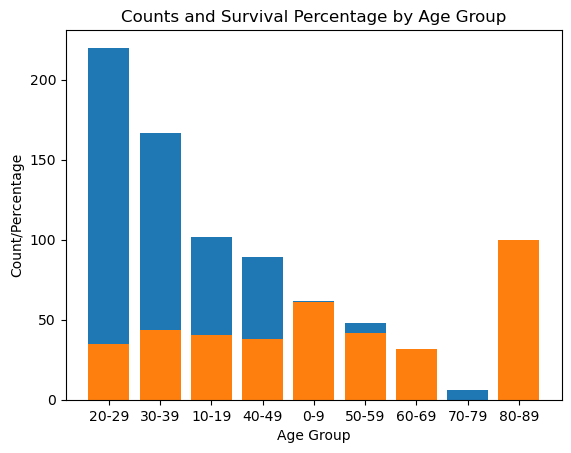

In [108]:
survivors_by_age = titanic.groupby('AgebyGroup')['Survived'].sum()
age_counts = titanic['AgebyGroup'].value_counts()

# Calculate percentage of survivors in each age group
survival_perc_age = survivors_by_age / age_counts * 100

# Create bar chart
plt.bar(age_counts.index, age_counts.values, label='Total Count')
plt.bar(survivors_by_age.index, survival_perc_age.values, label='Survival Percentage')

plt.xlabel('Age Group')
plt.ylabel('Count/Percentage')
plt.title('Counts and Survival Percentage by Age Group')

plt.show()


In the previous chart, we can see the distribution of passengers by age and the proportion that survived. We can appreciate that being less than one year old and between 50 and 69 give passengers more chances to survive. This could be because these ages had priorities in the rescue procedures. 